## Bolt Bootcamp Case Competition 2024 - Descriptive Analysis

#### Description

NullFraud Bank’s immediate task is to refine its fraud detection while ensuring transaction processes remain smooth and customer-friendly. The bank is currently wrestling with increased digital transactions, sophisticated cyber threats, and changing consumer habits – all of which have led to more false alarms, rising operational costs, and a risk to customer trust.

Design a solution that :
* Reduces fraud
* Cuts down on False Positives

In [220]:
# Load in dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning the Data

In [221]:
# Loading in the dataset
url = "data/bolt_data_set.xlsx"
raw_df = pd.read_excel(url)
print(raw_df.head())

  Card Identifier Transaction Date Transaction Time  Risk Assessment  \
0          card 1       2023-05-11       16:22:14.0            362.0   
1          card 2       2023-06-05       15:16:35.0            602.0   
2          card 3       2023-06-05       11:57:40.0            482.0   
3          card 4       2023-07-20       18:26:30.0            947.0   
4          card 5       2023-03-03       19:03:11.0           1382.0   

          Payment Method  Transaction Value Merchant Location  \
0  Paypass - Contactless              13.98               USA   
1                 Online              24.64               USA   
2                Unknown              15.00               USA   
3                 Online              30.56               USA   
4        Magnetic Stripe              50.85               USA   

  Card Present Status Chip Usage Cross-border Transaction (Yes/No)  \
0                  CP        Yes                                No   
1                 CNP         No    

In [222]:
# Checking for number of rows and columns
print(raw_df.shape)

(100000, 14)


In [223]:
# Checking for null values
print(raw_df.isnull().sum())

Card Identifier                        0
Transaction Date                       0
Transaction Time                       0
Risk Assessment                      972
Payment Method                         0
Transaction Value                      0
Merchant Location                      0
Card Present Status                    0
Chip Usage                             0
Cross-border Transaction (Yes/No)      0
Acquiring Institution ID               0
Merchant Identifier                    0
Merchant Category Code (MCC)           3
Fraud Indicator (Yes/No)               0
dtype: int64


We find that there are many null values for Risk Assessment. As this composes only 1% of the dataframe, we choose to first **remove** these NA values rather than fill them in with the median/mean as a strategy. 

In [224]:
clean_df = raw_df.dropna().copy()

# Check for null values
print(clean_df.isnull().sum())

Card Identifier                      0
Transaction Date                     0
Transaction Time                     0
Risk Assessment                      0
Payment Method                       0
Transaction Value                    0
Merchant Location                    0
Card Present Status                  0
Chip Usage                           0
Cross-border Transaction (Yes/No)    0
Acquiring Institution ID             0
Merchant Identifier                  0
Merchant Category Code (MCC)         0
Fraud Indicator (Yes/No)             0
dtype: int64


In [225]:
# Removing '0' Cross Border Transaction Values
# TO-DO

Now we will check that all columns contain the correct data types.

In [226]:
print(clean_df.dtypes)

Card Identifier                              object
Transaction Date                     datetime64[ns]
Transaction Time                             object
Risk Assessment                             float64
Payment Method                               object
Transaction Value                           float64
Merchant Location                            object
Card Present Status                          object
Chip Usage                                   object
Cross-border Transaction (Yes/No)            object
Acquiring Institution ID                     object
Merchant Identifier                          object
Merchant Category Code (MCC)                float64
Fraud Indicator (Yes/No)                     object
dtype: object


We will convert categorical data to the 'category' type.

In [227]:
# Convert categorical data to category type 
clean_df['Payment Method'] = clean_df['Payment Method'].astype('category')
clean_df['Merchant Location'] = clean_df['Merchant Location'].astype('category')
clean_df['Merchant Category Code (MCC)'] = clean_df['Merchant Category Code (MCC)'].astype('category')

We will also remove duplicates to maintain data integrity.

In [228]:
clean_df = clean_df.drop_duplicates()

In [229]:
# Date and Time Manipulation
clean_df['Year'] = clean_df['Transaction Date'].dt.year
clean_df['Month'] = clean_df['Transaction Date'].dt.month
clean_df['Day'] = clean_df['Transaction Date'].dt.day
clean_df['Hour'] = clean_df['Transaction Date'].apply(lambda x : x.hour)

We will similarly remove all values of '0' from the Cross-border Transaction variable.

In [230]:
clean_df = clean_df[clean_df['Cross-border Transaction (Yes/No)'] != 0]

#### Merchant Category Code (MCC)

In [231]:
distinct_MCC = clean_df['Merchant Category Code (MCC)'].unique()
print(distinct_MCC)

[5812.0, 4121.0, 7211.0, 5814.0, 5816.0, ..., 3813.0, 3030.0, 5561.0, 3078.0, 3390.0]
Length: 409
Categories (409, float64): [742.0, 763.0, 780.0, 1520.0, ..., 9402.0, 9405.0, 9406.0, 9999.0]


We join this with a descriptive dataset that shows the edited description of each MCC. This dataset was obtained from an unlicensed repository: https://github.com/greggles/mcc-codes

In [232]:
# Loading in data:
MCC_desc_df = pd.read_csv("data/mcc_codes.csv")
MCC_desc_df.head(5)

,mcc,edited_description,combined_description,usda_description,irs_description,irs_reportable
0,742,Veterinary Services,Veterinary Services,Veterinary Services,Veterinary Services,Yes
1,763,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Cooperative,Yes
2,780,"Horticultural Services, Landscaping Services","Horticultural Services, Landscaping Services",Horticultural Services,Landscaping Services,Yes
3,1520,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors,Yes
4,1711,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,"Heating, Plumbing, A/C",Yes


In [233]:
clean_df = pd.merge(clean_df, MCC_desc_df[['mcc', 'edited_description']], 
                     left_on = 'Merchant Category Code (MCC)', 
                     right_on = 'mcc',
                     how = 'left')

clean_df.drop(columns='mcc', inplace=True)

In [234]:
print(clean_df.head())

  Card Identifier Transaction Date Transaction Time  Risk Assessment  \
0          card 1       2023-05-11       16:22:14.0            362.0   
1          card 2       2023-06-05       15:16:35.0            602.0   
2          card 3       2023-06-05       11:57:40.0            482.0   
3          card 4       2023-07-20       18:26:30.0            947.0   
4          card 5       2023-03-03       19:03:11.0           1382.0   

          Payment Method  Transaction Value Merchant Location  \
0  Paypass - Contactless              13.98               USA   
1                 Online              24.64               USA   
2                Unknown              15.00               USA   
3                 Online              30.56               USA   
4        Magnetic Stripe              50.85               USA   

  Card Present Status Chip Usage Cross-border Transaction (Yes/No)  \
0                  CP        Yes                                No   
1                 CNP         No    

In [235]:
# Rename 'edited_description' column to 'Merchant Category'
clean_df = clean_df.rename(columns={'edited_description': 'Merchant Category'})

In [236]:
print(clean_df.dtypes)

Card Identifier                              object
Transaction Date                     datetime64[ns]
Transaction Time                             object
Risk Assessment                             float64
Payment Method                             category
Transaction Value                           float64
Merchant Location                          category
Card Present Status                          object
Chip Usage                                   object
Cross-border Transaction (Yes/No)            object
Acquiring Institution ID                     object
Merchant Identifier                          object
Merchant Category Code (MCC)                float64
Fraud Indicator (Yes/No)                     object
Year                                          int32
Month                                         int32
Day                                           int32
Hour                                          int64
Merchant Category                            object
dtype: objec

We will save this clean dataframe to be used for model training and testing.

In [239]:
clean_df.to_csv('../data/cleaned/cleaned_df.csv', index=False)

In [240]:
# Only fraudulent observations
only_fraud_clean_df = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes']
only_fraud_clean_df.to_csv('../data/cleaned/only_fraud_cleaned_df.csv', index=False)

## Exploratory Data Analysis

### 1 | Descriptive Statistics

In [182]:
# Summary statistics for numerical fields
print(clean_df.describe())

       Risk Assessment  Transaction Value  Merchant Category Code (MCC)  \
count     98906.000000       98906.000000                  98906.000000   
mean        843.289659          68.755387                   5805.854053   
std         747.379321         295.545790                   1065.835137   
min           2.000000           0.000000                    742.000000   
25%         352.000000           6.750000                   5411.000000   
50%         592.000000          18.960000                   5812.000000   
75%        1052.000000          49.750000                   5942.000000   
max        4932.000000       15000.000000                   9999.000000   

          Year         Month           Day     Hour  
count  98906.0  98906.000000  98906.000000  98906.0  
mean    2023.0      6.426961     15.510262      0.0  
std        0.0      3.435525      8.828495      0.0  
min     2023.0      1.000000      1.000000      0.0  
25%     2023.0      3.000000      8.000000      0.0  


In [183]:
# Frequency counts for categorical fields
print(clean_df['Payment Method'].value_counts())
print(clean_df['Merchant Location'].value_counts())
print(clean_df['Fraud Indicator (Yes/No)'].value_counts())

Payment Method
Online                   36604
Paypass - Contactless    20922
Chip                     16422
Subscription             11160
PayPass - Wallet          7568
Magnetic Stripe           3744
Unknown                    895
Phone                      770
Postal                     607
Mobile Wallet              114
Tap-to-Pay                  98
eCommerce                    2
Name: count, dtype: int64
Merchant Location
USA    84947
GBR     3423
FRA     1272
ESP      954
NLD      768
       ...  
RWA        1
SEN        1
GLP        1
SVN        1
SYC        1
Name: count, Length: 136, dtype: int64
Fraud Indicator (Yes/No)
No     98641
Yes      265
Name: count, dtype: int64


In [184]:
clean_df.head()

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,Merchant Category
Transaction Date,,,,,,,,,,,,,,,,,,
2023-05-11,card 1,16:22:14.0,362.0,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812.0,No,2023,5,11,0,Eating places and Restaurants
2023-06-05,card 2,15:16:35.0,602.0,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121.0,No,2023,6,5,0,Taxicabs and Limousines
2023-06-05,card 3,11:57:40.0,482.0,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211.0,No,2023,6,5,0,Laundry – Family and Commercial
2023-07-20,card 4,18:26:30.0,947.0,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814.0,No,2023,7,20,0,Fast Food Restaurants
2023-03-03,card 5,19:03:11.0,1382.0,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812.0,No,2023,3,3,0,Eating places and Restaurants


### 2 | Temporal Analysis

In [185]:
clean_df.set_index('Transaction Date', inplace=True)
# Check that transaction date is already the index
print(clean_df.index)

KeyError: "None of ['Transaction Date'] are in the columns"

We aim to analyse trends and patterns through comparing transaction dates as follows:

Text(0, 0.5, 'Number of transactions')

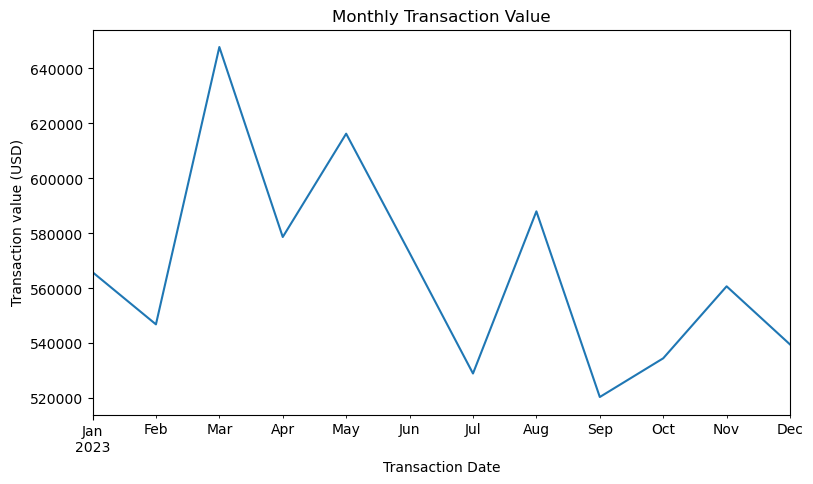

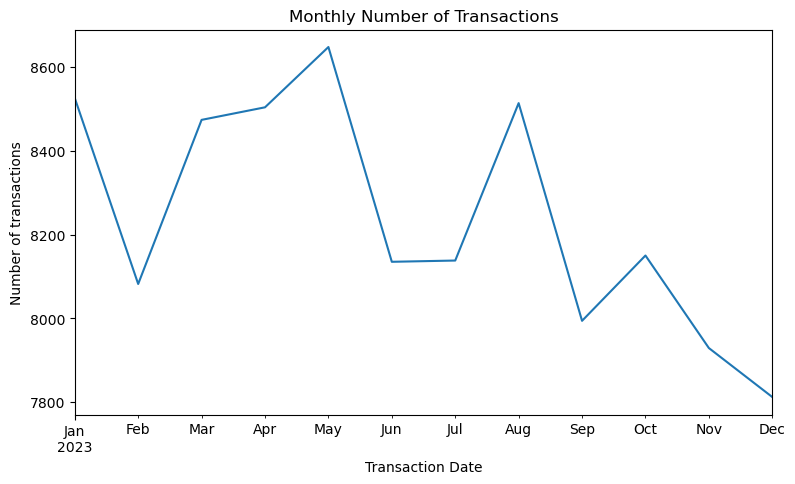

In [186]:
# Sum transaction values per month
monthly_values = clean_df['Transaction Value'].resample('M').sum()
plt.figure(figsize = (9, 5))
monthly_values.plot(kind = 'line', title = 'Monthly Transaction Value')
plt.ylabel("Transaction value (USD)")

# Compare with number of transactions per month
monthly_transactions = clean_df.resample('M').size()
plt.figure(figsize = (9, 5))
monthly_transactions.plot(kind = 'line', title = 'Monthly Number of Transactions')
plt.ylabel("Number of transactions")

In [187]:
# TO-DO

### 3 | Categorical Analysis

We will then investigate categorical data by examining how different categories relate to other variables, especially whether the transaction was flagged as fraud.

#### Percentage of Transactions Flagged for Fraud

Fraud Indicator (Yes/No)
No     98641
Yes      265
Name: count, dtype: int64


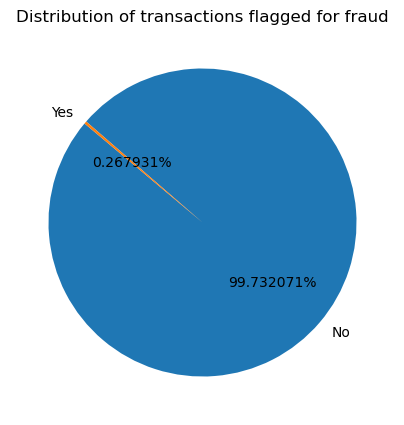

In [188]:
# Distribution of response variable Fraud Indicator
plt.figure(figsize = (5, 5))

print(clean_df['Fraud Indicator (Yes/No)'].value_counts())

fraud_counts = clean_df['Fraud Indicator (Yes/No)'].value_counts()

fraud_counts.plot(kind = "pie", autopct = '%1.6f%%', startangle = 140, labels = fraud_counts.index)
plt.title('Distribution of transactions flagged for fraud')
plt.ylabel('')
plt.show()

A relatively small percentage of all transactions are flagged for fraud: 0.267931%.

#### Merchant Category Code

In [189]:
clean_df.head()

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,Merchant Category
Transaction Date,,,,,,,,,,,,,,,,,,
2023-05-11,card 1,16:22:14.0,362.0,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812.0,No,2023,5,11,0,Eating places and Restaurants
2023-06-05,card 2,15:16:35.0,602.0,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121.0,No,2023,6,5,0,Taxicabs and Limousines
2023-06-05,card 3,11:57:40.0,482.0,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211.0,No,2023,6,5,0,Laundry – Family and Commercial
2023-07-20,card 4,18:26:30.0,947.0,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814.0,No,2023,7,20,0,Fast Food Restaurants
2023-03-03,card 5,19:03:11.0,1382.0,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812.0,No,2023,3,3,0,Eating places and Restaurants


In [190]:
# Calculate total number of transactions per merchant category
total_transactions_per_category = clean_df.groupby('Merchant Category').size()

# Calculate total number of fraudulent transactions per merchant category
fraud_transactions_per_category = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes'].groupby('Merchant Category').size()

# Calculate fraud rate for each merchant category
fraud_rate_per_category = (fraud_transactions_per_category / total_transactions_per_category) * 100

In [199]:
significant_categories = total_transactions_per_category[total_transactions_per_category > 0]

# Filter fraud rates to include only significant categories
significant_fraud_rate_per_category = fraud_rate_per_category[significant_categories.index].sort_values(ascending=False)

In [202]:
print(significant_fraud_rate_per_category.head(10))

Merchant Category
HO JO INN, HOWARD JOHNSON                                                      100.000000
Roofing – Contractors, Sheet Metal Work – Contractors, Siding – Contractors     50.000000
COMFORT INNS                                                                    50.000000
LOEWS HOTELS                                                                    33.333333
FARIFIELD INN                                                                   28.571429
HOMEWOOD SUITES                                                                 25.000000
Automotive Tire Stores                                                           9.090909
Truck and Utility Trailer Rentals                                                8.333333
Dating and Escort Services                                                       7.692308
Advertising Services                                                             6.462585
dtype: float64


Susceptible to fraud: Inns, hotels, and services.

In [203]:
significant_categories = total_transactions_per_category[total_transactions_per_category > 10]

# Filter fraud rates to include only significant categories
significant_fraud_rate_per_category = fraud_rate_per_category[significant_categories.index].sort_values(ascending=False)

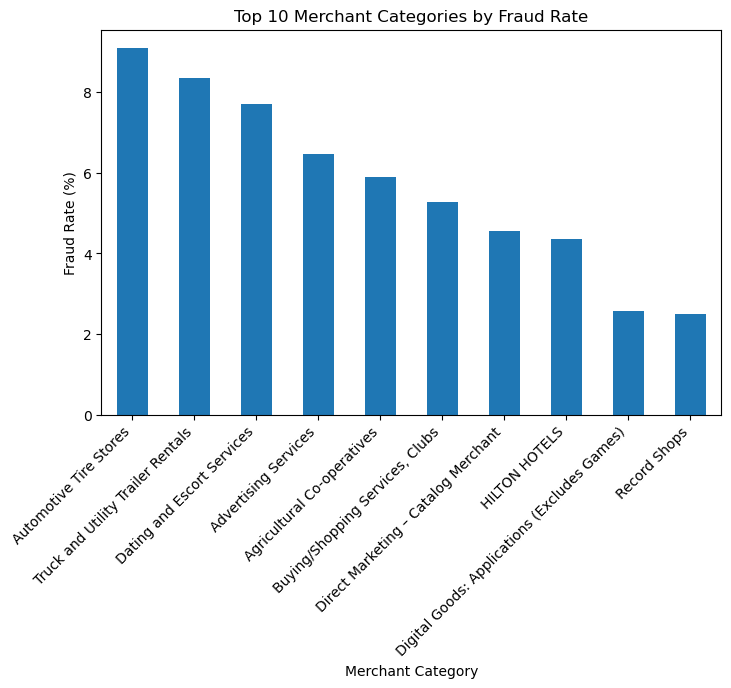

In [241]:
import matplotlib.pyplot as plt

# Assuming 'significant_fraud_rate_per_category' is sorted and contains fraud rates for significant merchant categories
top_10_fraud_categories = significant_fraud_rate_per_category.head(10)

# Plotting
plt.figure(figsize=(8, 5))
top_10_fraud_categories.plot(kind='bar')
plt.title('Top 10 Merchant Categories by Fraud Rate')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate the category names for better readability
plt.show()

#### Payment Method

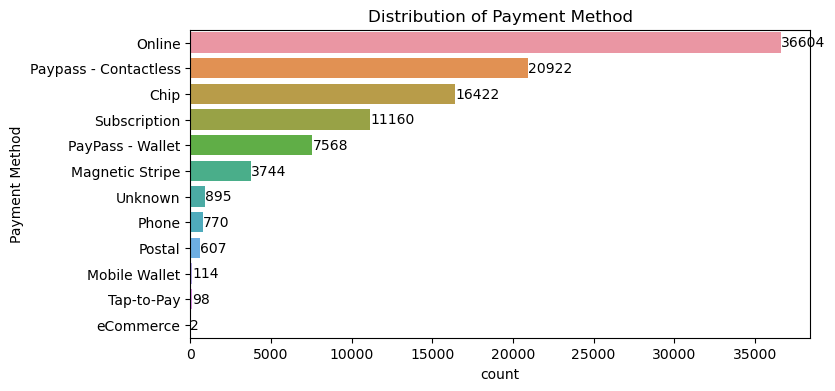

In [149]:
# Payment method
payment_order = clean_df['Payment Method'].value_counts().index
    
# print(clean_df['Payment Method'].value_counts())
plt.figure(figsize = (8, 4))
ax = sns.countplot(y = 'Payment Method', data = clean_df, order = payment_order)
plt.title(f'Distribution of Payment Method')

# Add counts
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() # bar's starting coordinates

    ax.text(x + width + 5, y + height/2, f'{int(width)}', va = 'center')

plt.show()

We will examine the proportion of fraudulent vs non-fraudulent transactions per payment method to hopefully detect a pattern.

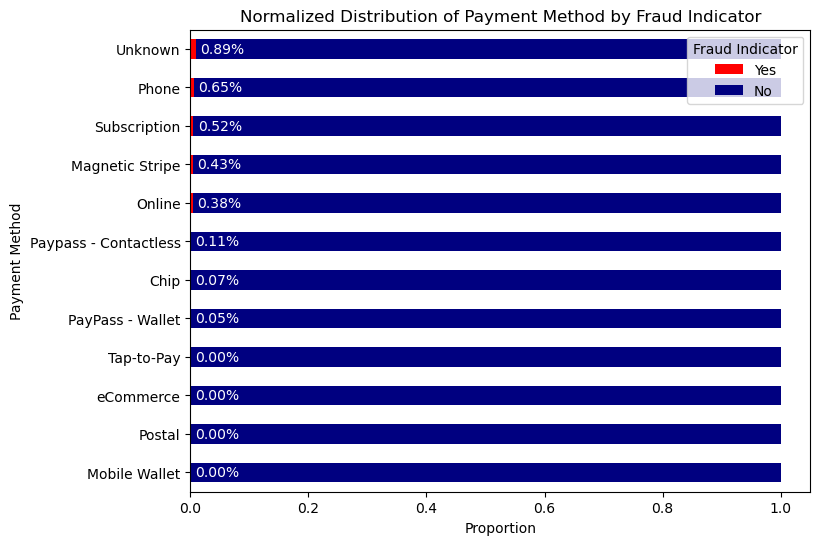

In [150]:
# Creating a normalized count of 'Payment Method' for fraudulent and non-fraudulent transactions
payment_fraud_dist = clean_df.groupby(['Payment Method', 'Fraud Indicator (Yes/No)'], observed=True).size().unstack(fill_value=0)
payment_fraud_dist = payment_fraud_dist.apply(lambda x: x / x.sum(), axis=1)

# Calculate percentage of fraudulence for each payment method
total_counts = clean_df['Payment Method'].value_counts()
fraud_counts = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes']['Payment Method'].value_counts()
fraud_percentage = (fraud_counts / total_counts) * 100

# Convert fraud_percentage to a DataFrame
fraud_percentage_df = fraud_percentage.reset_index()
fraud_percentage_df.columns = ['Payment Method', 'Fraud Percentage']

# Merge to get fraud percentage alongside the normalized distribution
sorted_payment_fraud_dist = payment_fraud_dist.merge(fraud_percentage_df, on='Payment Method')

# Sort the merged DataFrame by fraud percentage
sorted_payment_fraud_dist.sort_values(by='Fraud Percentage', ascending=True, inplace=True)

# Plotting
sorted_payment_fraud_dist.set_index('Payment Method')[['Yes', 'No']].plot(kind='barh', stacked=True, figsize=(8, 6), color=['red', 'navy'])
plt.title('Normalized Distribution of Payment Method by Fraud Indicator')
plt.xlabel('Proportion')
plt.ylabel('Payment Method')
plt.legend(title='Fraud Indicator', loc='upper right')

# Annotating percentage of fraudulent transactions
for i, row in enumerate(sorted_payment_fraud_dist.iterrows()):
    payment_method, data = row
    # Extract the fraud percentage for the current row/payment method
    fraud_perc = data['Fraud Percentage']
    # Correct the y position to match the sorted order
    y = i
    # Position the text using the fraud_perc value, offset slightly to the right for visibility
    plt.text(data['Yes'] + 0.045, y, f'{fraud_perc:.2f}%', va='center', ha='center', color='white')

# Adjust xlim if needed to distinguish between fraud indicator percentages
# plt.xlim(0, 0.05)

plt.show()

#### Merchant Distribution
Because of the extremely high variety between merchant locations (categorical), we will instead look at the locations where the highest percetanges of fraudulent transactions have been found.

In [151]:
# Calculate the total number of transactions per merchant location
total_per_location = clean_df.groupby('Merchant Location').size()

# Number of fraudulent transactions per merchant location
fraud_per_location = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes'].groupby('Merchant Location').size()

# Fraud rate for each merchant location
fraud_rate = (fraud_per_location/total_per_location) * 100
fraud_rate = fraud_rate.sort_values(ascending = False)

fraud_rate

Merchant Location
GIB    50.000000
LBN    38.888889
KEN    12.500000
ARM    10.000000
FIN    10.000000
         ...    
UGA     0.000000
UKR     0.000000
URY     0.000000
ABW     0.000000
AGO     0.000000
Length: 136, dtype: float64

It seems like some locations have very few data points, and as such, we will filter only for locations with a significant number of transactions.

In [152]:
significant_locations = total_per_location[total_per_location > 10]
significant_fraud_rate = fraud_rate[significant_locations.index].sort_values(ascending = False)

# Identify top 10 merchant locations with the highest fraud rate
top_fraud_locations = significant_fraud_rate.head(10)
top_fraud_locations

Merchant Location
LBN    38.888889
SGP     7.389163
IND     6.896552
ECU     5.000000
PER     4.761905
ISL     3.125000
DOM     3.030303
DEU     2.439024
BRA     2.208202
ITA     1.016260
dtype: float64

From previous visualizations, we know that 0.267931% of transactions are flagged for fraud. Similarly, we calculate the average per merchant location to compare with these high fraudulence locations.

In [153]:
# Average pct of fraudulence per merchant location
avg_fraud_rate_all = fraud_rate.mean()
print(f"Average % of fraudulence per merchant location: {avg_fraud_rate_all:.6f}%")

Average % of fraudulence per merchant location: 1.182484%


* **Abnormality in Lebanon:** These countries have the highest concentration of fraud, and abnormally so in Lebanon, with 38.9% of transactions being flagged for fraud.
* **Emerging Markets and Fraud Rates:** Some of the countries with higher fraud rates, like India (IND) and Ecuador (ECU), are considered emerging markets. This might reflect the challenges these countries face in fraud prevention, such as less mature financial infrastructures, regulatory environments, or discrepancies in the adoption of advanced security measures.

#### Binary variables

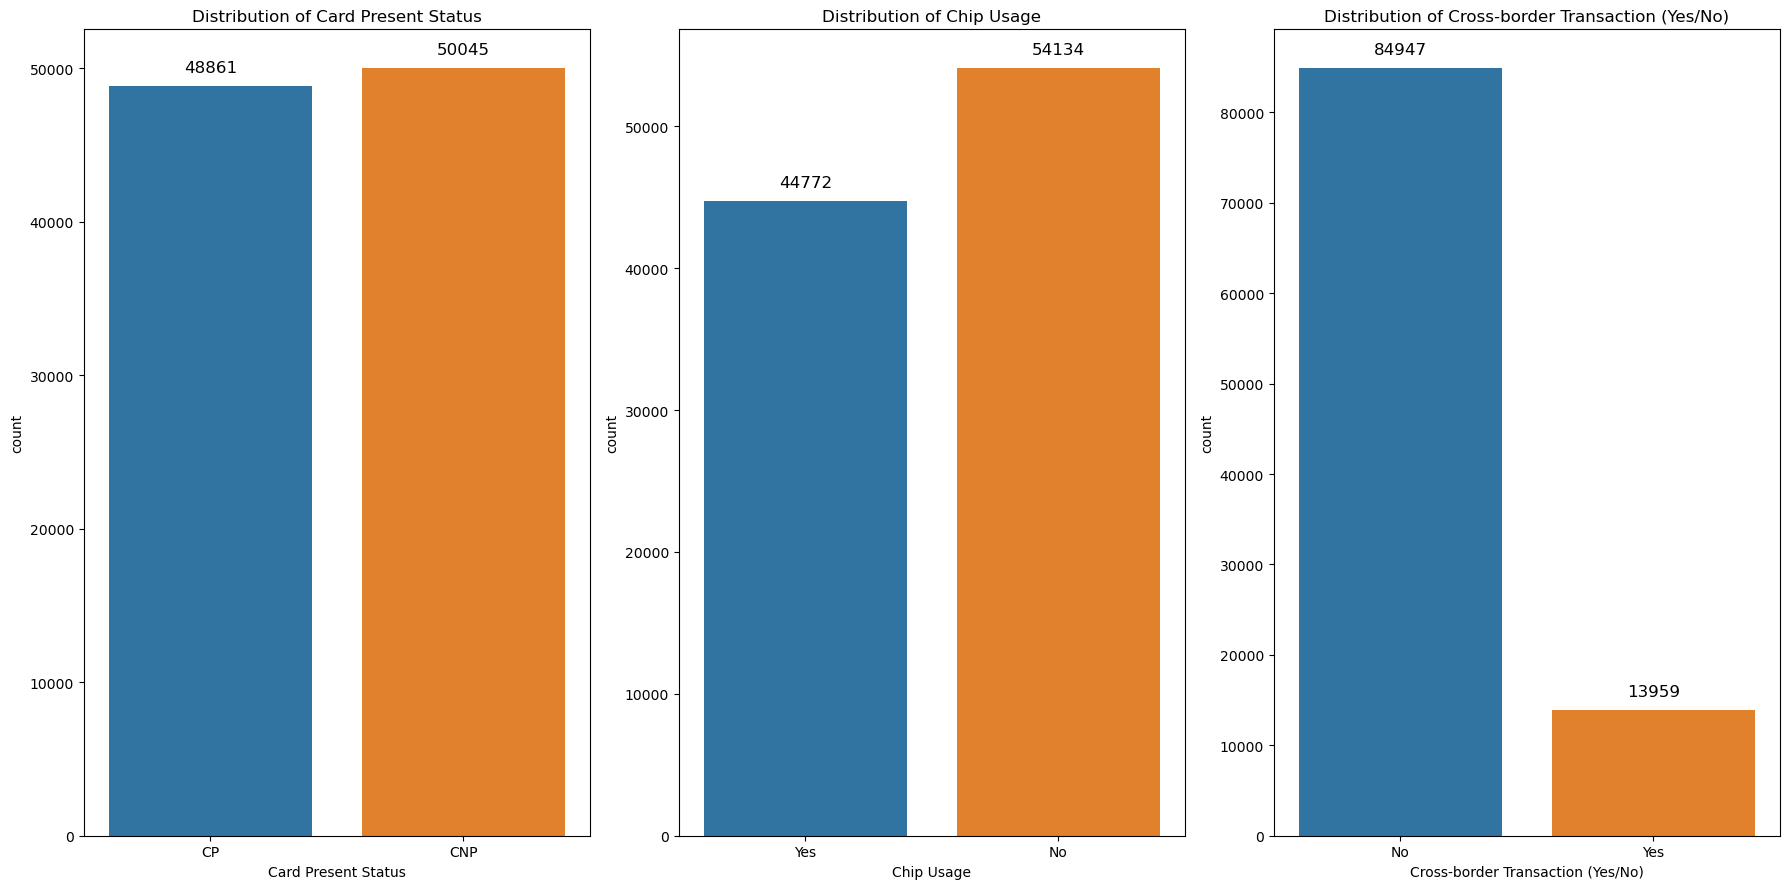

In [154]:
# Binary variables
# Card Present Status, Chip Usage, Cross-border Transaction (Yes/No)
categories = ['Card Present Status', 'Chip Usage', 'Cross-border Transaction (Yes/No)']

# Setting up matplotlib figure & axes
fig, axes = plt.subplots(1, len(categories), figsize = (18, 9))

for ax, c in zip(axes, categories):
    sns.countplot(x = c, data = clean_df, ax = ax)
    ax.set_title(f'Distribution of {c}')

    # Add counts 
    for p in ax.patches:
          ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, textcoords='offset points', xytext=(0,10))
    
plt.tight_layout()
plt.show()

While the counts for each category are quite balanced other than cross-border transactions (which is to be expected), we also plot the relation between these variables to fraudulence using stacked bar plots:

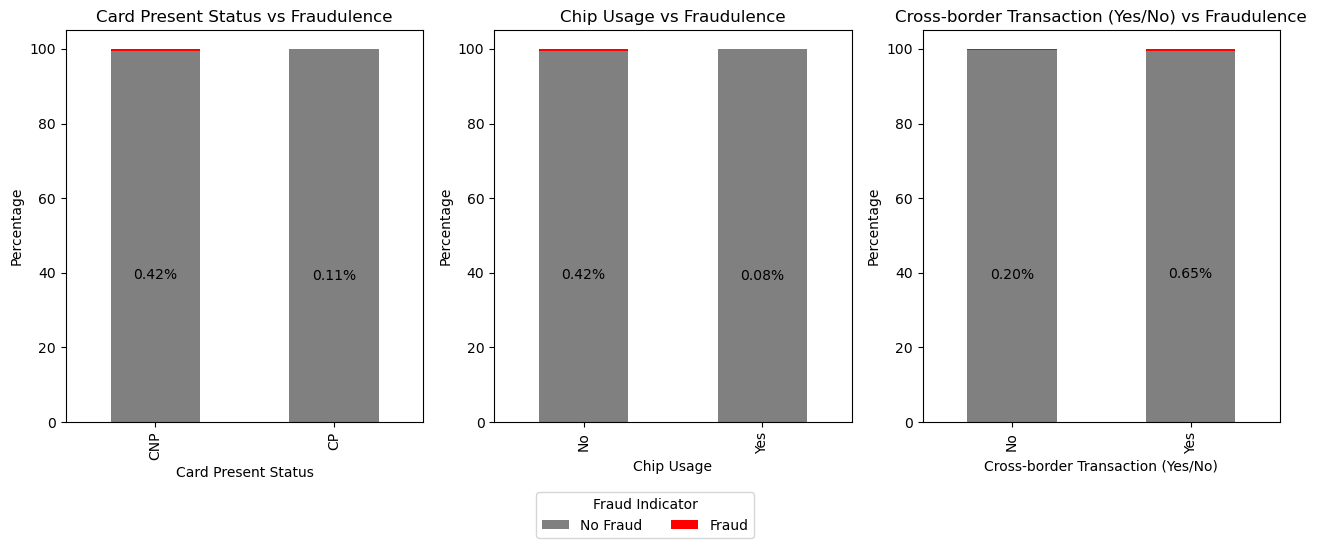

In [155]:
# Establishing binary variables
categories = ['Card Present Status', 'Chip Usage', 'Cross-border Transaction (Yes/No)']

# Setting up figure & axes
fig, axes = plt.subplots(1, len(categories), figsize=(13, 5))

# Loop through each binary variable 
for ax, c in zip(axes, categories):
    # Create a cross-tabulation of the binary variable and the fraud indicator
    crosstab = pd.crosstab(clean_df[c], clean_df['Fraud Indicator (Yes/No)'], normalize='index') * 100
    
    # Plot the stacked bar plot
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['grey', 'red'])
    
    # Set title and labels
    ax.set_title(f'{c} vs Fraudulence')
    ax.set_xlabel(c)
    ax.set_ylabel('Percentage')

    # Annotating with percentages
    for bar in ax.containers:  # iterate through the stacked bars
        for p in bar.patches:
            height = p.get_height()
            # Determine if the patch represents fraudulent transactions
            if p.get_facecolor() == (1.0, 0.0, 0.0, 1.0): 
                # Annotate the bar with the percentage for fraudulent transactions
                ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 100), 
                            textcoords='offset points')
                
for ax in axes:
    ax.legend().set_visible(False)

# Create a single legend for the entire figure
fig.legend(labels=['No Fraud', 'Fraud'], 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.1), 
           title='Fraud Indicator', 
           ncol=2)
plt.tight_layout()
plt.show()

#### Cross tabulation with fraud indicator

In [156]:
# Comparing distribution with fraud indicator
# TO-DO

#### Chi-Square Test for Independence

We perform the Chi-square test to see if there is a significant relationship between each categorical variable and the fraud indicator. This is useful for understanding whether the occurrence of fraud is independent of certain categories such as merchant location or payment method.

In [157]:
from scipy.stats import chi2_contingency

categories = ['Card Present Status', 
              'Chip Usage', 
              'Cross-border Transaction (Yes/No)', 
              'Risk Assessment',
              'Payment Method', 
              'Transaction Value',
              'Merchant Location',
              'Merchant Category Code (MCC)']

for category in categories[:-1]: 
    contingency_table = pd.crosstab(clean_df[category], clean_df['Fraud Indicator (Yes/No)'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{category} - p-value: {p}")

Card Present Status - p-value: 5.383848817728829e-21
Chip Usage - p-value: 2.1958704289262313e-24
Cross-border Transaction (Yes/No) - p-value: 6.5051876113018414e-21
Risk Assessment - p-value: 0.0
Payment Method - p-value: 2.0386422879988157e-21
Transaction Value - p-value: 0.0
Merchant Location - p-value: 0.0


**So what do these p-values tell us?**

1. **'Card Present Status', 'Chip Usage', 'Cross-border Transaction', 'Payment Method'** display **very small p-values**. These extremely small numbers suggest that the likelihood of observing the data if the null hypothesis were true (no association) is extremely low. In practical terms, these results indicate that there is a very strong statistical significance and a likely association between each of these categories and the occurence of fraud. The distribution of fraud indicators varies significantly across the different levels of these categorical variables.
2. **'Risk Assessment', 'Transaction Value', 'Merchant Location'** display a **p-value of 0** (likely due to rounding). This suggests a certain statistical association between these variables and the 'Fraud Indicator (Yes/No)'. 

#### Cramér's V Test

To measure the association between two categorical variables, we will conduct Cramér's V test to quantify the strength of then association and uncover trends between the variables. A value close to 0 implies little association, and closer to 1 implies strong association.

In [158]:
# Establish categories tested:

categories = ['Card Present Status', 
              'Chip Usage', 
              'Cross-border Transaction (Yes/No)', 
              'Risk Assessment',
              'Payment Method', 
              'Transaction Value',
              'Merchant Location',
              'Merchant Category Code (MCC)']

def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
    return cramers_v

# Comparing 'Payment Method' with 'Fraud Indicator'
for c in categories:
    cramers_v_value = cramers_v(clean_df[c], clean_df['Fraud Indicator (Yes/No)'])
    print(f"{c}: {cramers_v_value}")

Card Present Status: 0.029724385577123456
Chip Usage: 0.032245345011337606
Cross-border Transaction (Yes/No): 0.02966066849583715
Risk Assessment: 0.3032596563816111
Payment Method: 0.03390723967705102
Transaction Value: 0.298090525518079
Merchant Location: 0.14172863438503566
Merchant Category Code (MCC): 0.13796010489253901


* ***WEAK ASSOCIATIONS:*** **Card Present Status (0.0297), Chip Usage (0.0322)**, **Cross-border Transaction (0.0298)**, and **Payment Method (0.0339)** have very low Cramér's V values, suggesting these variables have very weak associations with the variable they were compared against. These factors might not be strong predictors on their own for the variable of interest in your analysis.

* ***MODERATELY WEAK ASSOCIATIONS:*** **Merchant Location (0.1417)** and **Merchant Category Code (MCC) (0.1379)** have slightly higher but still relatively low Cramér's V values. There is a weak association with the variable they were compared against, indicating they have a bit more influence than the previously mentioned variables but still a limited predictive power.

* ***MODERATELY STRONG ASSOCIATIONS:*** **Risk Assessment (0.3033)** and **Transaction Value (0.2983)** stand out with the highest Cramér's V values among those listed, indicating a moderate association with the variable they were compared against. This suggests that these variables have a more substantial relationship and could be more significant predictors in your analysis.



### 4 | Correlation Analysis

One hot encode categorical variables for the correlation matrix.

We will first examine the relation between payment methods and fraud detection.

In [159]:
# df_encoded = pd.get_dummies(df_for_correlation, columns=['Payment Method', 
#                                                          'Merchant Location', 
#                                                          'Card Present Status', 
#                                                          'Chip Usage', 
#                                                          'Cross-border Transaction (Yes/No)'])

In [160]:
# TO-DO: One-hot encode all the variables and plot in correlation matrix

### 5 | Visualizing Insights

We also plot a numerical variables 'Risk Assessment' and 'Transaction Value' against 'Fraud Indicator (Yes/No)' using violin plots and histograms to identify trends and mean/median placements.

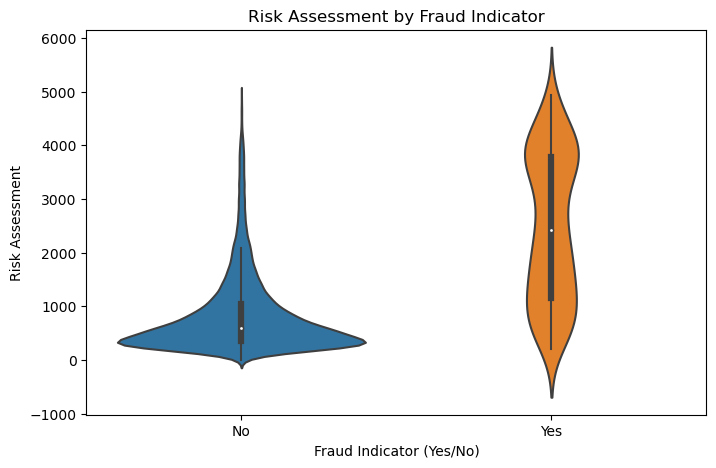

In [161]:
# For 'Risk Assessment'
# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='Fraud Indicator (Yes/No)', y='Risk Assessment', data=clean_df)
plt.title('Risk Assessment by Fraud Indicator')
plt.show()

**RISK ASSESSMENT**

* **Distribution Shape:** The 'Risk Assessment' for non-fraudulent transactions (No) is tightly concentrated around lower values with a narrow distribution, indicating that **most non-fraudulent transactions have a low-risk assessment score**. The distribution for fraudulent transactions (Yes) is wider, suggesting a **greater variability in the risk assessment scores for fraudulent transactions**.

* **Range:** The range of 'Risk Assessment' scores for fraudulent transactions is broader than for non-fraudulent ones, indicating that **fraudulent transactions can have a wide range of risk scores, but tend to have higher scores on average.**

* **Median and Quartiles:** The median (indicated by the white dot) for fraudulent transactions is higher than for non-fraudulent ones, which aligns with the expectation that transactions deemed more risky are more likely to be fraudulent.

* **Outliers:** The plot for non-fraudulent transactions **shows fewer outliers compared to the plot for fraudulent transactions**, indicating that most non-fraudulent transactions adhere to a lower risk profile.

In [162]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

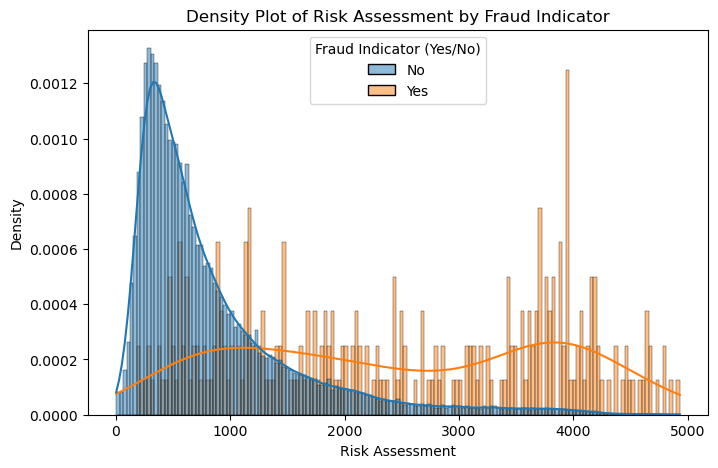

In [163]:
# Histogram
# For 'Risk Assessment'
plt.figure(figsize=(8, 5))
sns.histplot(data=clean_df, 
             x='Risk Assessment', 
             hue='Fraud Indicator (Yes/No)', 
             kde=True,  
             stat="density", 
             common_norm=False)
plt.title('Density Plot of Risk Assessment by Fraud Indicator')
plt.show()

There are outliers and significant variability in the 'Risk Assessment' scores for fraudulent transactions, indicating that while 'Risk Assessment' is a useful indicator, it should be used in conjunction with other features for more accurate fraud detection.

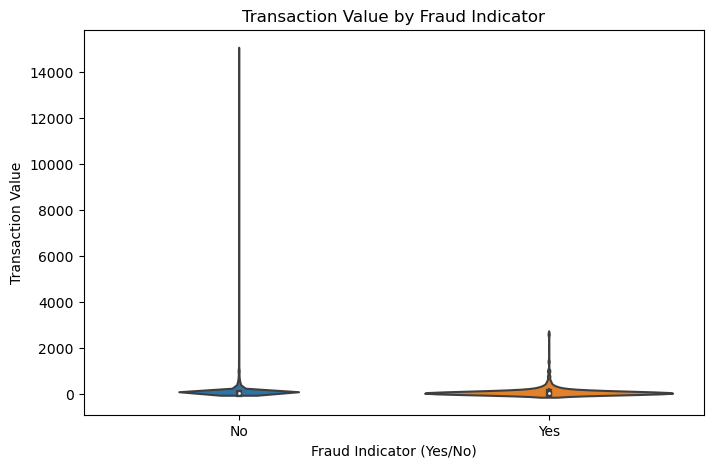

In [164]:
# For 'Transaction Value'
plt.figure(figsize=(8, 5))
sns.violinplot(x='Fraud Indicator (Yes/No)', y='Transaction Value', data=clean_df)
plt.title('Transaction Value by Fraud Indicator')
plt.show()

**TRANSACTION VALUE**, while showing some difference in the distribution between fraudulent and non-fraudulent transactions, does not appear to be as distinct. Both types of transactions can have low to high values, but strangely, extremely high transaction values are more commonly associated with non-fraudulent transactions.

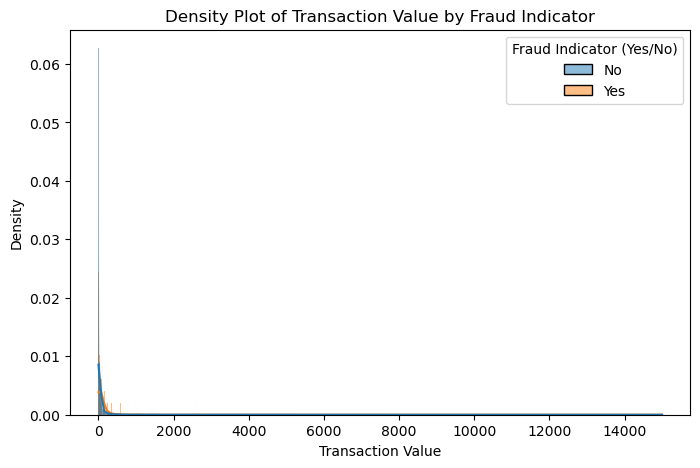

In [165]:
# Histogram
# For 'Transaction Value'
plt.figure(figsize=(8, 5))
sns.histplot(data=clean_df, 
             x='Transaction Value', 
             hue='Fraud Indicator (Yes/No)', 
             kde=True,  
             stat="density", 
             common_norm=False)
plt.title('Density Plot of Transaction Value by Fraud Indicator')
plt.show()

### 6 | Individual Analysis

To identify trends in fraudulence in relation to the frequency of orders made, we single out cards that have been flagged for fraudulence, and look at segments of time where fraudulence was detected.

In [166]:
clean_df_fraudulent = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes']
# Transaction date is already index

Let's first look at the monthly frequency of fraudulent transactions.

In [167]:
monthly_fraud = clean_df_fraudulent.resample('M').size()

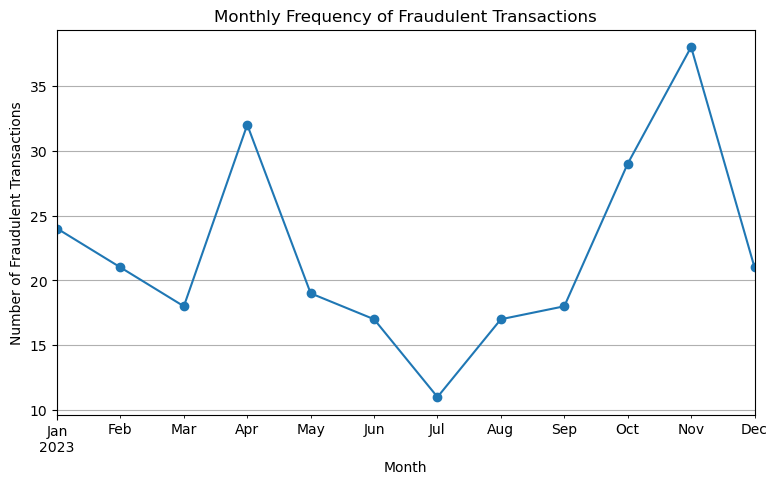

In [168]:
plt.figure(figsize = (9, 5))
monthly_fraud.plot(kind = 'line', marker = 'o', linestyle = '-')
plt.title('Monthly Frequency of Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.show()

Let us however normalize this by looking at the percentage of fraudulent transactions per month.

In [169]:
# Total number of transactions per month
total_transactions_per_month = clean_df.groupby('Month').size()

# Total number of fraudulent transactions per month
fraud_transactions_per_month = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes'].groupby('Month').size()

# Fraud rate per month
fraud_rate_per_month = (fraud_transactions_per_month/total_transactions_per_month) * 100

fraud_rate_per_month.index = pd.to_datetime(fraud_rate_per_month.index, format = "%m").month_name()
fraud_rate_per_month

Month
January      0.281492
February     0.259837
March        0.212414
April        0.376294
May          0.219704
June         0.208974
July         0.135168
August       0.199671
September    0.225169
October      0.355828
November     0.479253
December     0.268817
dtype: float64

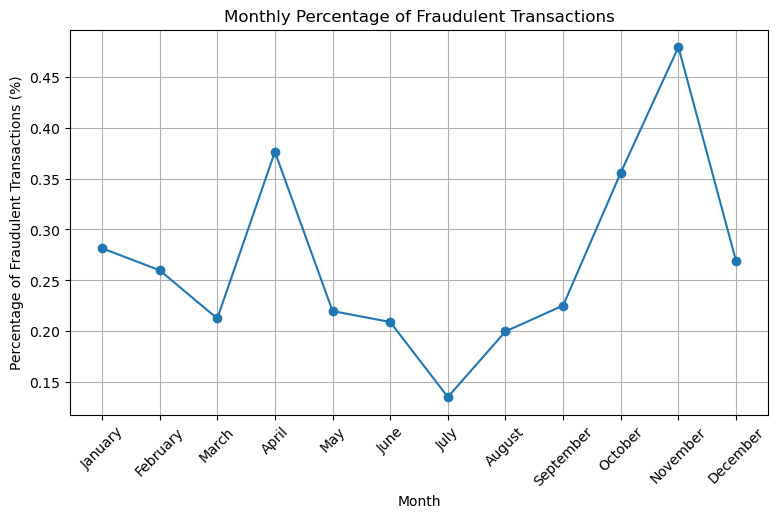

In [170]:
# Visualizing fraud rate
plt.figure(figsize = (9, 5))
fraud_rate_per_month.plot(kind = 'line', marker = 'o', linestyle = '-')
plt.title('Monthly Percentage of Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.xticks(ticks=range(len(fraud_rate_per_month)), 
           labels=fraud_rate_per_month.index,
           rotation=45)
plt.grid(True)
plt.show()

We notice that **November** has a disproportionately high spike in percentage of fraud cases. Other months to consider are **April** and **October**. Fraud cases are significantly lower in **July** and spike downwards in **December**. We will perform a deep dive to this specific time segment and hopefully find patterns between frequency on transactions at a daily/ hourly/minute-wise scale.

In [172]:
# Setting up dataframes
november_transactions = clean_df.loc['2023-11']
november_fraud = november_transactions[november_transactions['Fraud Indicator (Yes/No)'] == 'Yes']

In [173]:
# Separate to the frequency of transactions
# Daily frequency
daily_fraud_november = november_fraud.resample('D').size()

# Hourly frequency
hourly_fraud_november = november_fraud.resample('H').size()

# Minute-wise frequency
minute_fraud_november = november_fraud.resample('T').size() 

**Per Case Card ID Analysis**

Let's look at a card ID that is has been flagged for fraud the most number of times. 

In [174]:
total_transactions_per_card = clean_df.groupby('Card Identifier').size()
fraud_transactions_per_card = clean_df[clean_df['Fraud Indicator (Yes/No)'] == 'Yes'].groupby('Card Identifier').size()

# Calculate fraud rate per card
fraud_rate_per_card = (fraud_transactions_per_card / total_transactions_per_card) * 100
highest_fraud_card = fraud_rate_per_card.idxmax()

In [175]:
# Filter and display transaction history for this card
fraud_card_transactions = clean_df[clean_df['Card Identifier'] == highest_fraud_card]
fraud_card_transactions

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,edited_description
Transaction Date,,,,,,,,,,,,,,,,,,
2023-03-10,card 1104,22:13:40.0,787.0,Subscription,9.99,USA,CNP,No,No,acquirer 2,merchant 206,4899.0,Yes,2023,3,10,0,Cable and other pay television (previously Cab...
2023-02-10,card 1104,22:13:41.0,1607.0,Subscription,9.99,USA,CNP,No,No,acquirer 2,merchant 206,4899.0,Yes,2023,2,10,0,Cable and other pay television (previously Cab...


This card only has 2 transactions, both with very high risk assessments. However, to identify meaningful trends we will instead filter for cards with more than 20 transactions.

In [176]:
# Filter cards with more than 10 transactions
significant_transactions_card = total_transactions_per_card[total_transactions_per_card > 25].index

significant_fraud_rate_per_card = fraud_rate_per_card.loc[significant_transactions_card].sort_values(ascending=False)
significant_fraud_rate_per_card.head(5)

Card Identifier
card 818     13.432836
card 998     10.714286
card 1596     7.894737
card 1757     6.250000
card 1906     5.769231
dtype: float64

In [206]:
# Pick the card with the highest fraud rate from this filtered list for a baseline
card_for_analysis = significant_fraud_rate_per_card.idxmax()
card_2 = 'card 998'
card_3 = 'card 1596'
card_4 = 'card 1757'
card_5 = 'card 1906'

In [112]:
# Filter transactions for the selected card
selected_card_transactions = clean_df[clean_df['Card Identifier'] == card_for_analysis]

# Resample to analyze frequency and values
daily_selected_card_transactions = selected_card_transactions.resample('D').size()
daily_selected_card_values = selected_card_transactions.resample('D')['Transaction Value'].sum()

Let us look at the days where the card has 4 or more transactions to analyse transaction frequency.

In [113]:
# Filter days with more than 5 transactions
busy_days = daily_selected_card_transactions[daily_selected_card_transactions >= 4]

# Extract transactions for busy days
busy_days_list = busy_days.index.normalize().tolist()
detailed_transactions_on_busy_days = selected_card_transactions[selected_card_transactions.index.normalize().isin(busy_days_list)]

In [114]:
detailed_transactions_on_busy_days

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour
Transaction Date,,,,,,,,,,,,,,,,,
2023-10-29,card 818,10:54:0.0,1282.0,Online,0.00,USA,CNP,No,No,acquirer 535,merchant 748,5311.0,No,2023,10,29,0
2023-10-29,card 818,11:36:54.0,2192.0,Magnetic Stripe,51.54,USA,CP,No,No,acquirer 1039,merchant 1,5812.0,Yes,2023,10,29,0
2023-10-29,card 818,11:55:03.0,4217.0,Online,383.20,USA,CNP,No,No,acquirer 49,merchant 2318,5733.0,No,2023,10,29,0
2023-10-29,card 818,10:53:9.0,1227.0,Online,0.00,USA,CNP,No,No,acquirer 2,merchant 748,5311.0,No,2023,10,29,0


* Relatively high risk assessment
* Transaction time relatively close (all within an hour)
* Payment method used magnetic stripe
* Card was present

In [210]:
# Filter transactions for card 2
selected_card_2_transactions = clean_df[clean_df['Card Identifier'] == card_2]

# Resample to analyze frequency and values
daily_card_2_transactions = selected_card_2_transactions.resample('D').size()
daily_card_2_values = selected_card_2_transactions.resample('D')['Transaction Value'].sum()

# Filter days with 4 or more transactions
busy_days_card_2 = daily_card_2_transactions[daily_card_2_transactions >= 3]

# Extract transactions for busy days
busy_days_list_card_2 = busy_days_card_2.index.normalize().tolist()
detailed_transactions_on_busy_days_card_2 = selected_card_2_transactions[selected_card_2_transactions.index.normalize().isin(busy_days_list_card_2)]

detailed_transactions_on_busy_days_card_2

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,Merchant Category
Transaction Date,,,,,,,,,,,,,,,,,,
2023-04-24,card 998,21:26:04.0,4162.0,Magnetic Stripe,98.76,USA,CP,No,No,acquirer 18,merchant 410,5912.0,Yes,2023,4,24,0,Drug Stores and Pharmacies
2023-04-23,card 998,14:03:28.0,527.0,Online,0.01,USA,CNP,No,No,acquirer 18,merchant 895,5912.0,No,2023,4,23,0,Drug Stores and Pharmacies
2023-04-24,card 998,20:11:57.0,3667.0,Magnetic Stripe,81.21,USA,CP,No,No,acquirer 18,merchant 410,5912.0,Yes,2023,4,24,0,Drug Stores and Pharmacies
2023-04-24,card 998,19:56:36.0,3107.0,Magnetic Stripe,79.55,USA,CP,No,No,acquirer 18,merchant 410,5912.0,Yes,2023,4,24,0,Drug Stores and Pharmacies
2023-04-23,card 998,20:40:21.0,3527.0,Magnetic Stripe,76.39,USA,CP,No,No,acquirer 18,merchant 410,5912.0,No,2023,4,23,0,Drug Stores and Pharmacies
2023-04-23,card 998,21:09:16.0,4122.0,Magnetic Stripe,76.39,USA,CP,No,No,acquirer 18,merchant 410,5912.0,No,2023,4,23,0,Drug Stores and Pharmacies


In [215]:
# Filter transactions for card 3
selected_card_3_transactions = clean_df[clean_df['Card Identifier'] == card_3]

# Resample to analyze frequency and values
daily_card_3_transactions = selected_card_3_transactions.resample('D').size()
daily_card_3_values = selected_card_3_transactions.resample('D')['Transaction Value'].sum()

# Filter days with 4 or more transactions
busy_days_card_3 = daily_card_3_transactions[daily_card_3_transactions >= 4]

# Extract transactions for busy days
busy_days_list_card_3 = busy_days_card_3.index.normalize().tolist()
detailed_transactions_on_busy_days_card_3 = selected_card_3_transactions[selected_card_3_transactions.index.normalize().isin(busy_days_list_card_3)]

detailed_transactions_on_busy_days_card_3

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,Merchant Category
Transaction Date,,,,,,,,,,,,,,,,,,
2023-03-01,card 1596,16:32:35.0,197.0,Paypass - Contactless,8.17,ARE,CP,Yes,Yes,acquirer 509,merchant 400,7941.0,No,2023,3,1,0,"Commercial Sports, Athletic Fields, Profession..."
2023-03-01,card 1596,14:30:28.0,362.0,Paypass - Contactless,51.74,ARE,CP,Yes,Yes,acquirer 238,merchant 55,7230.0,No,2023,3,1,0,Barber and Beauty Shops
2023-03-01,card 1596,11:07:18.0,312.0,Paypass - Contactless,15.25,ARE,CP,Yes,Yes,acquirer 165,merchant 1,5812.0,No,2023,3,1,0,Eating places and Restaurants
2023-03-01,card 1596,24:15:.0,497.0,Paypass - Contactless,2.52,ARE,CP,Yes,Yes,acquirer 277,merchant 465,5411.0,No,2023,3,1,0,"Grocery Stores, Supermarkets"


In [217]:
# Filter transactions for card 4
selected_card_4_transactions = clean_df[clean_df['Card Identifier'] == card_4]

# Resample to analyze frequency and values
daily_card_4_transactions = selected_card_4_transactions.resample('D').size()
daily_card_4_values = selected_card_4_transactions.resample('D')['Transaction Value'].sum()

# Filter days with 4 or more transactions
busy_days_card_4 = daily_card_4_transactions[daily_card_4_transactions >= 3]

# Extract transactions for busy days
busy_days_list_card_4 = busy_days_card_4.index.normalize().tolist()
detailed_transactions_on_busy_days_card_4 = selected_card_4_transactions[selected_card_4_transactions.index.normalize().isin(busy_days_list_card_4)]

detailed_transactions_on_busy_days_card_4

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,Merchant Category
Transaction Date,,,,,,,,,,,,,,,,,,
2023-04-17,card 1757,10:59:57.0,547.0,Chip,4.39,USA,CP,Yes,No,acquirer 341,merchant 11,5411.0,Yes,2023,4,17,0,"Grocery Stores, Supermarkets"
2023-02-12,card 1757,17:42:29.0,1097.0,Chip,45.96,USA,CP,Yes,No,acquirer 6,merchant 198,5993.0,No,2023,2,12,0,Cigar Stores and Stands
2023-02-15,card 1757,74:25:4.0,1067.0,Subscription,5.00,USA,CNP,No,No,acquirer 22,merchant 52,7999.0,No,2023,2,15,0,Recreation Services (Not Elsewhere Classified)
2023-02-15,card 1757,95:31:8.0,1272.0,Online,3.43,USA,CNP,No,No,acquirer 2,merchant 2,4121.0,No,2023,2,15,0,Taxicabs and Limousines
2023-04-17,card 1757,74:35:2.0,592.0,Online,5.00,USA,CNP,No,No,acquirer 22,merchant 52,7999.0,Yes,2023,4,17,0,Recreation Services (Not Elsewhere Classified)
2023-02-12,card 1757,15:06:21.0,587.0,Subscription,15.00,USA,CNP,No,No,acquirer 22,merchant 52,7999.0,No,2023,2,12,0,Recreation Services (Not Elsewhere Classified)
2023-02-12,card 1757,15:40:14.0,502.0,Subscription,5.00,USA,CNP,No,No,acquirer 22,merchant 52,7999.0,No,2023,2,12,0,Recreation Services (Not Elsewhere Classified)
2023-04-17,card 1757,10:56:56.0,527.0,Chip,5.45,USA,CP,Yes,No,acquirer 6,merchant 109,5814.0,No,2023,4,17,0,Fast Food Restaurants
2023-02-15,card 1757,16:29:15.0,2397.0,Online,31.90,USA,CNP,No,No,acquirer 893,merchant 1,5812.0,No,2023,2,15,0,Eating places and Restaurants


In [219]:
# Filter transactions for card 5
selected_card_5_transactions = clean_df[clean_df['Card Identifier'] == card_5]

# Resample to analyze frequency and values
daily_card_5_transactions = selected_card_5_transactions.resample('D').size()
daily_card_5_values = selected_card_5_transactions.resample('D')['Transaction Value'].sum()

# Filter days with 4 or more transactions
busy_days_card_5 = daily_card_5_transactions[daily_card_5_transactions >= 2]

# Extract transactions for busy days
busy_days_list_card_5 = busy_days_card_5.index.normalize().tolist()
detailed_transactions_on_busy_days_card_5 = selected_card_5_transactions[selected_card_5_transactions.index.normalize().isin(busy_days_list_card_5)]

detailed_transactions_on_busy_days_card_5

,Card Identifier,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No),Year,Month,Day,Hour,Merchant Category
Transaction Date,,,,,,,,,,,,,,,,,,
2023-08-11,card 1906,13:55:26.0,272.0,Online,15.43,USA,CNP,No,No,acquirer 16,merchant 110,5999.0,No,2023,8,11,0,Miscellaneous and Specialty Retail Stores
2023-02-01,card 1906,62:00:6.0,482.0,Subscription,20.95,USA,CNP,No,No,acquirer 16,merchant 255,5999.0,No,2023,2,1,0,Miscellaneous and Specialty Retail Stores
2023-01-23,card 1906,14:17:28.0,232.0,Paypass - Contactless,15.00,USA,CP,Yes,No,acquirer 124,merchant 56,8011.0,No,2023,1,23,0,Doctors and Physicians (Not Elsewhere Classified)
2023-07-08,card 1906,22:32:15.0,537.0,Subscription,2.16,USA,CNP,No,No,acquirer 6,merchant 5,5816.0,No,2023,7,8,0,Digital Goods: Games
2023-08-18,card 1906,14:36:17.0,1072.0,Online,159.96,USA,CNP,No,No,acquirer 4,merchant 148,5331.0,Yes,2023,8,18,0,Variety Stores
2023-05-11,card 1906,13:16:41.0,347.0,Subscription,54.99,USA,CNP,No,No,acquirer 6,merchant 178,4899.0,No,2023,5,11,0,Cable and other pay television (previously Cab...
2023-03-12,card 1906,17:04:01.0,87.0,Online,0.00,USA,CNP,No,No,acquirer 218,merchant 541,5641.0,No,2023,3,12,0,Children’s and Infant’s Wear Stores
2023-03-23,card 1906,18:41:30.0,222.0,Online,25.56,USA,CNP,No,No,acquirer 2,merchant 282,5812.0,No,2023,3,23,0,Eating places and Restaurants
2023-02-01,card 1906,17:40:20.0,377.0,Paypass - Contactless,33.83,USA,CP,Yes,No,acquirer 6,merchant 7,5499.0,No,2023,2,1,0,Misc. Food Stores – Convenience Stores and Spe...


#### Average credit card transaction values

In [ ]:
# TO-DO

#### 7 | Clustering Analysis